In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.decomposition import PCA
from tqdm import tqdm
import ast

## Daten umwandeln

In [ ]:
def convert_csv(file):
    with open(file + ".csv", "w") as file_dst:
        with open(file, "r") as file_src:
            for line in file_src:
                #line = line.replace("[","[")
                #line = line.replace("]","]")
                line=line.replace(";","]|[")
                line=line.replace(" ",",")
                #line = line.replace(" ",";")

                file_dst.write(line)

path_to_data = "PATH_TO_DATA"
convert_csv(path_to_data)

## Daten visualisieren

In [2]:
df = pd.read_csv("data/cleared_train.csv")

In [3]:
df = df.drop(columns=["Unnamed: 0"], axis=1)
df = df.groupby(['Day']).mean()
df

,Time_1,Time_2,Time_3,Time_4,Time_5,Time_6,Time_7,Time_8,Time_9,Time_10,...,Time_135,Time_136,Time_137,Time_138,Time_139,Time_140,Time_141,Time_142,Time_143,Time_144
Day,,,,,,,,,,,,,,,,,,,,,
1,0.025321,0.023584,0.022736,0.020331,0.019756,0.018408,0.016887,0.016636,0.015670,0.015471,...,0.032394,0.031319,0.028765,0.027599,0.024511,0.024229,0.022588,0.020483,0.020352,0.017908
2,0.016666,0.015574,0.014975,0.013550,0.013242,0.012423,0.011383,0.011208,0.010492,0.010309,...,0.028921,0.027965,0.026302,0.025014,0.022831,0.022933,0.021297,0.019727,0.019567,0.017172
3,0.016123,0.015594,0.014975,0.013665,0.013437,0.012652,0.011642,0.011708,0.011067,0.010871,...,0.031339,0.030152,0.028004,0.026624,0.023919,0.023962,0.022270,0.020422,0.020221,0.017662
4,0.016278,0.015705,0.015089,0.013583,0.013507,0.012492,0.011589,0.011602,0.010949,0.010836,...,0.032229,0.030881,0.028563,0.027203,0.024441,0.024533,0.022709,0.020756,0.020626,0.017895
5,0.016845,0.015709,0.015379,0.014002,0.013765,0.012897,0.012018,0.011929,0.011299,0.011071,...,0.034259,0.033036,0.030995,0.029382,0.026510,0.026522,0.024494,0.022432,0.022151,0.019288
6,0.018312,0.017342,0.016707,0.015106,0.014955,0.014031,0.012989,0.012806,0.012239,0.012085,...,0.040805,0.039977,0.038003,0.036558,0.033518,0.033415,0.031257,0.028667,0.028189,0.024794
7,0.023558,0.022212,0.021320,0.019415,0.018913,0.017679,0.016281,0.016160,0.015266,0.015050,...,0.041784,0.040897,0.038813,0.037492,0.034467,0.034240,0.032441,0.029791,0.029187,0.025957


In [4]:
df_01 = pd.DataFrame(data=df.iloc[0])
df_01.columns = ["values"]
df_01 = df_01.reset_index()
df_01.columns = ["times", "values"]

df_02 = pd.DataFrame(data=df.iloc[1])
df_02.columns = ["values"]
df_02 = df_02.reset_index()
df_02.columns = ["times", "values"]

df_03 = pd.DataFrame(data=df.iloc[2])
df_03.columns = ["values"]
df_03 = df_03.reset_index()
df_03.columns = ["times", "values"]

df_04 = pd.DataFrame(data=df.iloc[3])
df_04.columns = ["values"]
df_04 = df_04.reset_index()
df_04.columns = ["times", "values"]

df_05 = pd.DataFrame(data=df.iloc[4])
df_05.columns = ["values"]
df_05 = df_05.reset_index()
df_05.columns = ["times", "values"]

df_06 = pd.DataFrame(data=df.iloc[5])
df_06.columns = ["values"]
df_06 = df_06.reset_index()
df_06.columns = ["times", "values"]

df_07 = pd.DataFrame(data=df.iloc[6])
df_07.columns = ["values"]
df_07 = df_07.reset_index()
df_07.columns = ["times", "values"]


[Text(0.0, 0, 'Time_0'),
 Text(1.0, 0, 'Time_1'),
 Text(2.0, 0, 'Time_2'),
 Text(3.0, 0, 'Time_3'),
 Text(4.0, 0, 'Time_4'),
 Text(5.0, 0, 'Time_5'),
 Text(6.0, 0, 'Time_6'),
 Text(7.0, 0, 'Time_7'),
 Text(8.0, 0, 'Time_8'),
 Text(9.0, 0, 'Time_9'),
 Text(10.0, 0, 'Time_10'),
 Text(11.0, 0, 'Time_11'),
 Text(12.0, 0, 'Time_12'),
 Text(13.0, 0, 'Time_13'),
 Text(14.0, 0, 'Time_14'),
 Text(15.0, 0, 'Time_15'),
 Text(16.0, 0, 'Time_16'),
 Text(17.0, 0, 'Time_17'),
 Text(18.0, 0, 'Time_18'),
 Text(19.0, 0, 'Time_19'),
 Text(20.0, 0, 'Time_20'),
 Text(21.0, 0, 'Time_21'),
 Text(22.0, 0, 'Time_22'),
 Text(23.0, 0, 'Time_23'),
 Text(24.0, 0, 'Time_24'),
 Text(25.0, 0, 'Time_25'),
 Text(26.0, 0, 'Time_26'),
 Text(27.0, 0, 'Time_27'),
 Text(28.0, 0, 'Time_28'),
 Text(29.0, 0, 'Time_29'),
 Text(30.0, 0, 'Time_30'),
 Text(31.0, 0, 'Time_31'),
 Text(32.0, 0, 'Time_32'),
 Text(33.0, 0, 'Time_33'),
 Text(34.0, 0, 'Time_34'),
 Text(35.0, 0, 'Time_35'),
 Text(36.0, 0, 'Time_36'),
 Text(37.0, 0, 'Time_

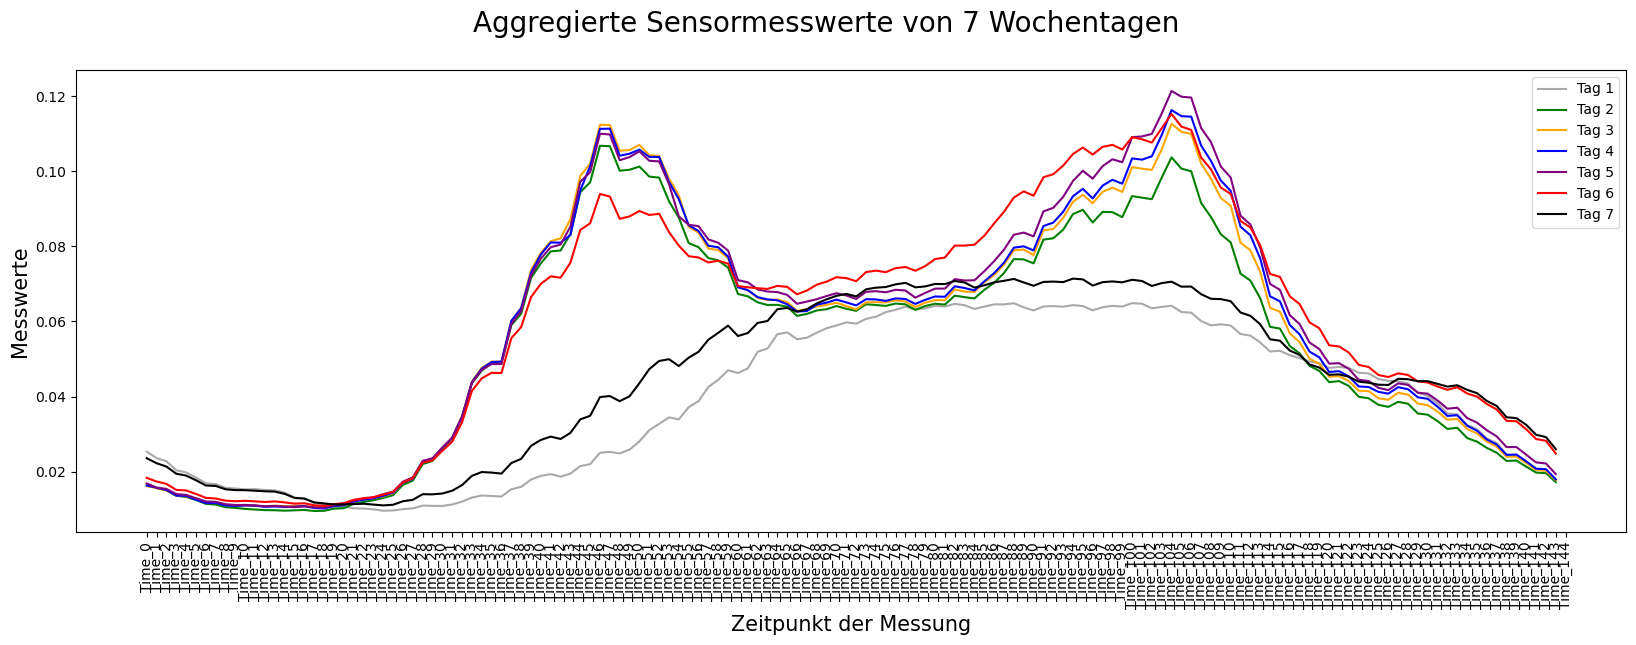

In [5]:
figure, axis = plt.subplots(figsize=(20,6))
figure.suptitle(f"Aggregierte Sensormesswerte von 7 Wochentagen", fontsize=20)
nr_y_01 = df_01["values"]
nr_y_02 = df_02["values"]
nr_y_03 = df_03["values"]
nr_y_04 = df_04["values"]
nr_y_05 = df_05["values"]
nr_y_06 = df_06["values"]
nr_y_07 = df_07["values"]

nr_x = np.arange(0, len(df_01))
axis.set_xlabel("Zeitpunkt der Messung", fontsize = 15)
axis.set_ylabel("Messwerte", fontsize = 15)
axis.plot(nr_x, nr_y_01, color="darkgrey", label='Tag 1')
axis.plot(nr_x, nr_y_02, color="green", label='Tag 2')
axis.plot(nr_x, nr_y_03, color="orange", label='Tag 3')
axis.plot(nr_x, nr_y_04, color="blue", label='Tag 4')
axis.plot(nr_x, nr_y_05, color="purple", label='Tag 5')
axis.plot(nr_x, nr_y_06, color="red", label='Tag 6')
axis.plot(nr_x, nr_y_07, color="black", label='Tag 7')

plt.rc('xtick', labelsize=5) 
plt.rc('ytick', labelsize=12) 

# Erstelle Legende
plt.legend()
# Anzahl an Ticks
label_am = 145
pos = np.arange(0, len(df_01) + 1, len(df_01) / (label_am - 1))
# Beschriftung 
labels = ['Time_' + str(i) for i in range(0, label_am)]
# setzt ticks
axis.set_xticks(pos)
# Beschriftung mit Winkeln
axis.set_xticklabels(labels, rotation=90)


## Daten gruppiert nach Zeit

In [6]:
df = pd.read_csv("data/cleared_train.csv")

In [7]:
X_train = df.drop(columns=["Unnamed: 0", "Day"])
y_train = df["Day"]

fets_train = X_train.drop("Sensor", axis=1).columns
sensors_train = X_train.Sensor
X_train = df.loc[:, fets_train].values

X_train = StandardScaler().fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns = fets_train)

In [8]:
X_train

,Time_1,Time_2,Time_3,Time_4,Time_5,Time_6,Time_7,Time_8,Time_9,Time_10,...,Time_135,Time_136,Time_137,Time_138,Time_139,Time_140,Time_141,Time_142,Time_143,Time_144
0,-0.232196,-0.621891,-0.490520,-0.330289,-0.364737,-0.229263,-0.239519,-0.355352,-0.175172,-0.238840,...,-0.858966,-0.679798,-0.631901,-0.693973,-0.651974,-0.584317,-0.499363,-0.583953,-0.573618,-0.425320
1,-0.526408,-0.833342,-0.510494,-0.583125,-0.487636,-0.335308,-0.368685,-0.489337,-0.376868,-0.461395,...,-0.753698,-0.806950,-0.869588,-0.836317,-0.575223,-0.632444,-0.751354,-0.353928,-0.633552,-0.667334
2,-0.637554,-0.602067,-0.457228,-0.432790,-0.419359,-0.469632,-0.318454,-0.313041,-0.293408,-0.266659,...,-0.490526,-0.719259,-0.654324,-0.496530,-0.580020,-0.695010,-0.677239,-0.563951,-0.518678,-0.471663
3,0.349688,0.514662,0.548169,0.400887,0.263412,0.548399,0.463721,0.589592,0.680295,0.929576,...,-0.275603,-0.171189,-0.053380,0.086618,0.005206,0.195347,-0.020086,-0.088899,0.025728,-0.075172
4,0.683128,0.765760,0.914374,0.728891,0.850595,0.689792,0.944507,0.956287,0.986316,0.894802,...,0.101609,0.219037,0.130492,0.173861,0.005206,0.103905,0.068852,0.211135,0.145597,0.228633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257116,-0.258348,-0.304713,-0.317405,-0.316622,-0.303288,-0.314099,-0.332805,-0.348300,-0.328183,-0.336208,...,-0.218582,-0.228188,-0.196889,-0.280719,-0.292204,-0.266676,-0.281959,-0.253917,-0.214011,-0.209052
257117,0.970801,1.182056,1.020906,1.009062,1.389984,1.333130,1.009090,1.287723,1.320157,1.339913,...,0.693745,0.701339,0.569988,0.903943,0.609621,0.421546,0.597539,0.761195,0.690002,0.784750
257118,-0.519869,-0.066830,0.055458,-0.309789,-0.118940,-0.349448,0.226916,-0.277782,0.026523,-0.009330,...,-0.433506,-0.508800,-0.282097,-0.551630,-0.196265,-0.415871,-0.173257,-0.178908,-0.428776,-0.147261
257119,0.153547,-0.251850,0.055458,-0.186787,-0.091629,-0.130288,-0.002713,-0.157901,-0.043027,0.004580,...,0.360395,0.447034,0.260547,0.137127,0.312210,0.103905,-0.029968,0.296144,0.255477,0.012365


In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components="mle", svd_solver = 'full')

pcas_train = pca.fit_transform(X_train)
pca_df_train = pd.DataFrame(data=pcas_train)
pca_df_train

,0,1,2,3,4,5,6,7,8,9,...,133,134,135,136,137,138,139,140,141,142
0,-3.062435,2.657993,-2.556956,0.262692,1.349017,2.207396,-0.849361,0.223139,0.242783,-0.669382,...,-0.018142,0.036253,0.057949,-0.012082,0.074293,-0.095255,0.083441,0.005482,0.237343,0.141757
1,-2.959758,2.548071,-3.785073,-0.000655,0.823500,2.077908,-0.718883,-0.283912,-0.450002,-1.236451,...,-0.148761,-0.090056,-0.057934,0.156247,0.111973,0.151499,0.303699,-0.114877,0.169689,-0.378170
2,-3.119257,2.421025,-2.617167,-0.159477,1.039031,1.922482,-0.709325,0.520871,0.184966,-0.503594,...,0.093779,-0.071209,0.001362,-0.036972,0.000038,-0.105622,-0.155273,-0.053077,0.110324,0.190837
3,2.256025,5.570979,-3.025784,0.755978,-0.188211,0.414380,0.495592,-1.783867,-1.391488,-0.686283,...,0.377672,0.165077,0.448965,0.192430,-0.135077,-1.300647,1.109791,-0.522040,-0.550669,1.149291
4,0.714818,3.420565,3.955201,-0.200466,1.096371,-0.564256,-0.624619,0.191528,0.560434,-0.028703,...,-0.001318,-0.035898,0.021144,0.027821,0.033642,0.032434,0.032533,0.063395,-0.001620,-0.003008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257116,0.988944,-1.875971,-2.209274,0.246926,0.861873,0.608625,0.421180,-0.376476,0.189801,-0.442871,...,0.010698,-0.024786,0.018701,0.064414,0.151321,-0.007017,-0.032042,-0.005727,-0.001962,0.001368
257117,9.143513,8.235104,0.292868,0.326641,1.088608,1.933650,-1.597647,1.486813,1.344689,0.860239,...,-0.144760,0.034442,0.111121,0.044164,-0.107688,-0.044878,-0.034259,-0.133390,-0.336016,0.081180
257118,5.405474,10.845829,-11.488483,3.416707,0.356870,7.459747,-0.937534,0.316334,0.064270,-0.444535,...,0.214760,-0.396116,-1.340524,-0.018469,-0.040614,0.501742,0.458521,-0.641903,-1.060151,-1.432146
257119,-1.400579,0.946393,1.698620,-1.562481,0.444259,1.022762,0.789702,0.465403,1.066712,0.935065,...,-0.030002,0.033354,0.026005,-0.171941,-0.013256,0.006214,-0.026417,-0.095495,0.089007,-0.012854


In [11]:
pca_df_train = pd.concat([pca_df_train, sensors_train, y_train], axis=1)

In [12]:
from sklearn.preprocessing import OrdinalEncoder

In [13]:
ord_enc = OrdinalEncoder()
pca_df_train["code_sensor"] = ord_enc.fit_transform(pca_df_train[["Sensor"]])
pca_df_train.drop("Sensor", axis=1, inplace=True)

In [14]:
pca_df_train

,0,1,2,3,4,5,6,7,8,9,...,135,136,137,138,139,140,141,142,Day,code_sensor
0,-3.062435,2.657993,-2.556956,0.262692,1.349017,2.207396,-0.849361,0.223139,0.242783,-0.669382,...,0.057949,-0.012082,0.074293,-0.095255,0.083441,0.005482,0.237343,0.141757,3,0.0
1,-2.959758,2.548071,-3.785073,-0.000655,0.823500,2.077908,-0.718883,-0.283912,-0.450002,-1.236451,...,-0.057934,0.156247,0.111973,0.151499,0.303699,-0.114877,0.169689,-0.378170,4,0.0
2,-3.119257,2.421025,-2.617167,-0.159477,1.039031,1.922482,-0.709325,0.520871,0.184966,-0.503594,...,0.001362,-0.036972,0.000038,-0.105622,-0.155273,-0.053077,0.110324,0.190837,3,0.0
3,2.256025,5.570979,-3.025784,0.755978,-0.188211,0.414380,0.495592,-1.783867,-1.391488,-0.686283,...,0.448965,0.192430,-0.135077,-1.300647,1.109791,-0.522040,-0.550669,1.149291,5,0.0
4,0.714818,3.420565,3.955201,-0.200466,1.096371,-0.564256,-0.624619,0.191528,0.560434,-0.028703,...,0.021144,0.027821,0.033642,0.032434,0.032533,0.063395,-0.001620,-0.003008,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257116,0.988944,-1.875971,-2.209274,0.246926,0.861873,0.608625,0.421180,-0.376476,0.189801,-0.442871,...,0.018701,0.064414,0.151321,-0.007017,-0.032042,-0.005727,-0.001962,0.001368,2,959.0
257117,9.143513,8.235104,0.292868,0.326641,1.088608,1.933650,-1.597647,1.486813,1.344689,0.860239,...,0.111121,0.044164,-0.107688,-0.044878,-0.034259,-0.133390,-0.336016,0.081180,5,959.0
257118,5.405474,10.845829,-11.488483,3.416707,0.356870,7.459747,-0.937534,0.316334,0.064270,-0.444535,...,-1.340524,-0.018469,-0.040614,0.501742,0.458521,-0.641903,-1.060151,-1.432146,3,959.0
257119,-1.400579,0.946393,1.698620,-1.562481,0.444259,1.022762,0.789702,0.465403,1.066712,0.935065,...,0.026005,-0.171941,-0.013256,0.006214,-0.026417,-0.095495,0.089007,-0.012854,7,959.0


In [15]:
test = pd.read_csv("data/df_cleared_test.csv")

In [16]:
X_test = test.drop(columns=["Unnamed: 0", "Day"])
y_test = test["Day"]

fets_test = X_test.drop("Sensor", axis=1).columns
sensors_test = X_test.Sensor
X_test = test.loc[:, fets_test].values

X_test = StandardScaler().fit_transform(X_test)
X_test = pd.DataFrame(X_test, columns=fets_test)

In [17]:
#pca = PCA(n_components="mle", svd_solver = 'full')
pcas_test = pca.fit_transform(X_test)
pca_df_test = pd.DataFrame(data=pcas_test)
pca_df_test

,0,1,2,3,4,5,6,7,8,9,...,133,134,135,136,137,138,139,140,141,142
0,1.437692,-1.947014,4.728712,0.622721,-1.303665,0.947684,-0.587125,0.117830,0.090733,0.275980,...,0.007394,0.072311,-0.056124,-0.054061,0.189534,0.164966,0.026812,-0.150058,0.099668,-0.242992
1,-2.937315,-4.113356,1.294441,0.348600,-1.151246,2.247106,-0.641635,-0.428238,-0.919906,0.188466,...,0.047788,-0.017239,0.219050,-0.246551,-0.249995,-0.169026,0.193613,-0.102754,0.411920,-0.210689
2,-2.790194,1.585091,0.845264,-1.775457,-0.102517,0.400486,-0.080375,0.910058,0.562574,-0.510081,...,0.000047,0.003142,0.086537,-0.041396,0.068083,0.025084,-0.036028,0.075458,-0.008786,-0.066942
3,1.451360,-3.441318,4.835274,0.977426,-0.565877,1.671365,-0.582821,-0.222574,-1.076701,0.724774,...,-0.063159,0.000787,-0.000693,-0.076673,-0.053421,-0.019144,0.321653,-0.510008,-0.157452,-0.308516
4,1.470210,-3.227005,5.072361,0.915745,-0.862020,1.702370,-0.377423,-0.045470,-0.685217,1.086605,...,-0.081793,0.041115,-0.543343,0.139882,0.142156,-0.263208,-0.292338,-0.009754,-0.394692,0.615057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166594,-3.055431,3.371925,2.302582,-3.081939,2.639484,-0.518862,-2.997799,1.438312,-0.996456,-0.027406,...,-0.076304,-0.170243,0.103921,0.042943,0.034443,-0.029992,0.027540,-0.041591,-0.057472,0.114948
166595,5.688810,-15.193720,6.006377,3.611802,-0.128681,7.366377,-0.975179,-0.228489,-1.434123,0.725590,...,0.131744,0.051225,-0.072855,0.387669,-0.639141,0.508186,0.910691,-1.149111,-1.011214,1.150463
166596,2.185361,-1.386125,-2.721199,0.447259,-0.027310,0.143807,0.285525,-0.292869,-0.141667,0.450175,...,-0.224268,-0.078656,-0.065013,-0.004757,-0.021434,0.011850,0.043651,-0.013021,0.016750,-0.014106
166597,2.920097,-3.657836,9.106467,2.476527,-0.197666,2.407538,-0.499012,0.149601,0.554357,0.099667,...,0.007223,0.040927,-0.090260,0.048347,-0.005408,0.002383,-0.006204,-0.063608,0.102673,-0.098078


In [18]:
pca_df_test = pd.concat([pca_df_test, sensors_test, y_test], axis=1)

In [19]:
ord_enc = OrdinalEncoder()
pca_df_test["code_sensor"] = ord_enc.fit_transform(pca_df_test[["Sensor"]])
pca_df_test.drop("Sensor", axis=1, inplace=True)

In [20]:
pca_df_test

,0,1,2,3,4,5,6,7,8,9,...,135,136,137,138,139,140,141,142,Day,code_sensor
0,1.437692,-1.947014,4.728712,0.622721,-1.303665,0.947684,-0.587125,0.117830,0.090733,0.275980,...,-0.056124,-0.054061,0.189534,0.164966,0.026812,-0.150058,0.099668,-0.242992,4,0.0
1,-2.937315,-4.113356,1.294441,0.348600,-1.151246,2.247106,-0.641635,-0.428238,-0.919906,0.188466,...,0.219050,-0.246551,-0.249995,-0.169026,0.193613,-0.102754,0.411920,-0.210689,2,0.0
2,-2.790194,1.585091,0.845264,-1.775457,-0.102517,0.400486,-0.080375,0.910058,0.562574,-0.510081,...,0.086537,-0.041396,0.068083,0.025084,-0.036028,0.075458,-0.008786,-0.066942,7,0.0
3,1.451360,-3.441318,4.835274,0.977426,-0.565877,1.671365,-0.582821,-0.222574,-1.076701,0.724774,...,-0.000693,-0.076673,-0.053421,-0.019144,0.321653,-0.510008,-0.157452,-0.308516,4,0.0
4,1.470210,-3.227005,5.072361,0.915745,-0.862020,1.702370,-0.377423,-0.045470,-0.685217,1.086605,...,-0.543343,0.139882,0.142156,-0.263208,-0.292338,-0.009754,-0.394692,0.615057,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166594,-3.055431,3.371925,2.302582,-3.081939,2.639484,-0.518862,-2.997799,1.438312,-0.996456,-0.027406,...,0.103921,0.042943,0.034443,-0.029992,0.027540,-0.041591,-0.057472,0.114948,1,959.0
166595,5.688810,-15.193720,6.006377,3.611802,-0.128681,7.366377,-0.975179,-0.228489,-1.434123,0.725590,...,-0.072855,0.387669,-0.639141,0.508186,0.910691,-1.149111,-1.011214,1.150463,3,959.0
166596,2.185361,-1.386125,-2.721199,0.447259,-0.027310,0.143807,0.285525,-0.292869,-0.141667,0.450175,...,-0.065013,-0.004757,-0.021434,0.011850,0.043651,-0.013021,0.016750,-0.014106,3,959.0
166597,2.920097,-3.657836,9.106467,2.476527,-0.197666,2.407538,-0.499012,0.149601,0.554357,0.099667,...,-0.090260,0.048347,-0.005408,0.002383,-0.006204,-0.063608,0.102673,-0.098078,6,959.0


In [21]:
rf = RandomForestClassifier(random_state=1)

In [22]:
rf.fit(X=pca_df_train.drop("Day", axis=1), y=y_train)

c:\Users\nikla\anaconda3\envs\NLP\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


RandomForestClassifier(random_state=1)

In [23]:
rf.score(X=pca_df_test.drop("Day", axis=1), y=y_test)

c:\Users\nikla\anaconda3\envs\NLP\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.2469282528706655

In [24]:
lr = LogisticRegression()

In [25]:
lr.fit(X=pca_df_train.drop("Day", axis=1), y=y_train)

c:\Users\nikla\anaconda3\envs\NLP\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\nikla\anaconda3\envs\NLP\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
lr.score(X=pca_df_test.drop("Day", axis=1), y=y_test)

c:\Users\nikla\anaconda3\envs\NLP\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.2284227396322907

## Daten gruppiert nach Sensoren

In [29]:
df=pd.read_csv('data/PEMS_train.csv',sep='|',header=None)
df.columns = ['Sensor_%s' % (n+1) for n in range(df.shape[1])]

for x in tqdm(df.columns.to_list()):
    listen=[]
    for num in range(len(df.index)):
        listen.append(ast.literal_eval(df[x][num]))
    df[x]=listen

100%|██████████| 963/963 [00:49<00:00, 19.34it/s]


In [30]:
df_empty=pd.DataFrame()

In [31]:
rows = []
from numpy import mean
appending=[]
for col, values in tqdm(df.iteritems()):
    row_fields=[]
    for row in values:
        row_fields.append(mean(row))
    df_empty[col]=row_fields


86it [00:00, 284.12it/s]C:\Users\nikla\AppData\Local\Temp\ipykernel_19368\288873778.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_empty[col]=row_fields
C:\Users\nikla\AppData\Local\Temp\ipykernel_19368\288873778.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_empty[col]=row_fields
C:\Users\nikla\AppData\Local\Temp\ipykernel_19368\288873778.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all co

In [32]:
test=[4,2,7,4,3,4,3,4,1,4,1,5,1,2,7,6,2,5,7,6,4,2,6,7,7,1,5,6,6,7,3,1,3,5,2,7,2,3,6,1,1,6,7,3,4,3,5,6,1,2,6,4,5,6,6,5,1,4,1,2,2,7,7,5,6,1,7,6,4,2,7,5,7,1,2,6,1,6,2,2,3,3,1,3,1,4,5,1,1,6,6,2,4,3,3,1,3,3,5,1,2,1,3,7,5,1,7,4,4,2,5,1,5,6,1,6,3,5,4,4,4,3,2,1,5,6,5,6,7,6,7,4,3,2,7,5,5,2,3,2,5,2,2,1,4,1,2,5,1,3,3,3,6,4,2,4,7,3,7,4,6,1,6,5,2,1,3,4,1,3,3,6,6]
a=[3,4,3,5,1,2,2,5,6,5,7,6,3,7,6,5,4,5,5,5,5,2,2,6,4,2,7,4,3,4,5,5,2,3,7,2,3,7,2,5,3,5,7,1,7,2,6,7,6,1,5,2,5,5,2,4,6,1,2,7,6,5,7,1,6,7,1,3,6,6,4,1,1,4,7,7,7,7,4,7,5,1,2,5,4,5,7,6,5,7,2,1,4,1,3,4,1,6,4,3,2,5,5,2,3,4,4,4,5,1,4,4,3,5,2,6,6,4,5,4,7,5,7,4,7,1,6,6,1,2,4,4,4,1,5,5,1,7,3,6,7,5,6,1,1,3,6,4,4,3,3,2,2,6,3,2,3,2,3,4,6,1,4,7,4,3,5,3,7,4,7,3,6,3,7,5,1,3,1,7,7,1,7,6,7,6,3,6,4,7,2,7,1,4,7,4,3,2,6,7,1,5,5,5,3,3,3,3,1,5,5,7,3,2,6,5,2,6,6,4,7,1,5,7,1,6,4,3,5,7,3,1,2,4,3,7,6,5,4,4,7,6,2,2,5,6,1,3,2,4,6,3,2,1,4,4,1,3,7,4,5,7,2,5,3,7,6]

In [33]:
df_empty['day']=a

C:\Users\nikla\AppData\Local\Temp\ipykernel_19368\462493660.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_empty['day']=a


In [35]:
df_test=pd.read_csv('data/PEMS_test.csv',sep='|',header=None)
df_test.columns = ['Sensor_%s' % (n+1) for n in range(df.shape[1])]
for x in tqdm(df_test.columns.to_list()):
    listen=[]
    for num in range(len(df_test.index)):
        listen.append(ast.literal_eval(df_test[x][num]))
    df_test[x]=listen


100%|██████████| 963/963 [00:32<00:00, 29.40it/s]


In [36]:
df_empty_test=pd.DataFrame()

In [37]:
rows = []
from numpy import mean
appending=[]
for col, values in tqdm(df_test.iteritems()):
    row_fields=[]
    for row in values:
        row_fields.append(mean(row))
    df_empty_test[col]=row_fields
df_empty_test['day']=test    

89it [00:00, 450.49it/s]C:\Users\nikla\AppData\Local\Temp\ipykernel_19368\2832927387.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_empty_test[col]=row_fields
C:\Users\nikla\AppData\Local\Temp\ipykernel_19368\2832927387.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_empty_test[col]=row_fields
C:\Users\nikla\AppData\Local\Temp\ipykernel_19368\2832927387.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider j

In [38]:
X=df_empty.drop(['day'],axis=1)
y=df_empty['day']
X_test=df_empty_test.drop(['day'],axis=1)
y_test=df_empty_test['day']

In [39]:
liste=[]
wert=[]
liste_log=[]

for n_comp in tqdm(range(1,210,1)):
    rf = RandomForestClassifier(n_estimators=5, random_state=1)
    logisticRegr = LogisticRegression(solver = 'lbfgs')
    pca=PCA(n_components = n_comp)
    df_pca=StandardScaler().fit_transform(X)
    df_pca=pca.fit_transform(df_pca)
    principalDf = pd.DataFrame(data = df_pca
                , columns=['Wert_%s' % (n+1) for n in range(df_pca.shape[1])])
    principalDf
    logisticRegr.fit(principalDf, y)
    rf.fit(principalDf, y)
    X_test_fit = StandardScaler().fit_transform(X_test)
    df_pca_test=pca.transform(X_test_fit)
    principalDf_test = pd.DataFrame(data = df_pca_test
        , columns=['Wert_%s' % (n+1) for n in range(df_pca_test.shape[1])])
    y_pred_log=logisticRegr.predict(principalDf_test)
    y_pred=rf.predict(principalDf_test)
    liste.append(metrics.accuracy_score(y_test, y_pred))
    wert.append(n_comp)
    liste_log.append(metrics.accuracy_score(y_test, y_pred_log))

  0%|          | 0/209 [00:00<?, ?it/s]c:\Users\nikla\anaconda3\envs\NLP\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\nikla\anaconda3\envs\NLP\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stabl

In [40]:
reg=pd.DataFrame()
reg['pca_num']=wert
reg['logisticRegr']=liste_log
reg['rfc']=liste
logistic=reg.sort_values(by='logisticRegr',ascending=False).head(5).drop('rfc',axis=1)
rfc=reg.sort_values(by='rfc',ascending=False).head(5).drop('logisticRegr',axis=1)

In [41]:
logistic

,pca_num,logisticRegr
60,61,0.820809
160,161,0.815029
159,160,0.815029
131,132,0.815029
133,134,0.815029


In [42]:
rfc

,pca_num,rfc
116,117,0.734104
10,11,0.710983
51,52,0.687861
19,20,0.687861
12,13,0.682081
